Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


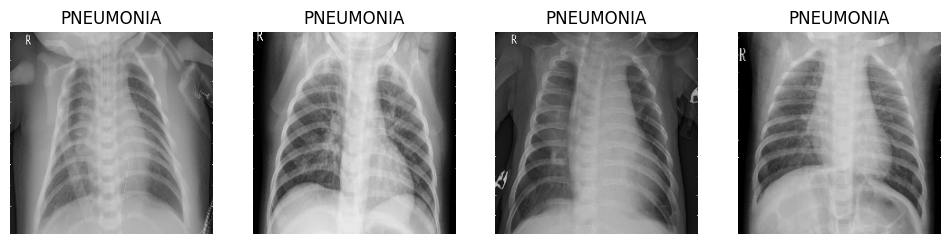

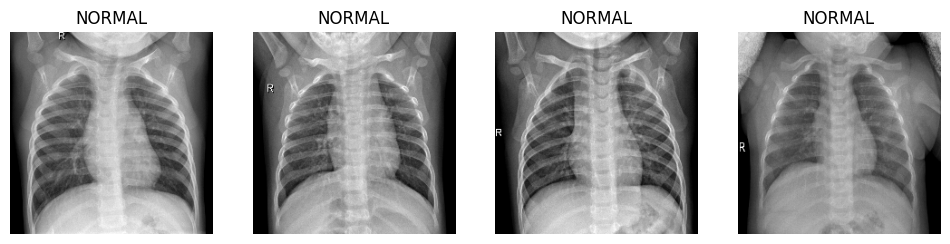

2024-04-01 01:24:46.122560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define path to the data directory
data_dir = Path('/Users/deva/Desktop/DEVA/CSUN/Sem_3/Research/chest_xray')
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

# Create training, testing, and validation datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='binary'  
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='binary'
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='binary'
)


# Get class names
class_names = train_dataset.class_names

# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i][0])])
        plt.axis("off")
    plt.show()

# Visualize four examples from each class
for images, labels in train_dataset.take(1):  # take one batch
    labels = labels.numpy() 
    
    pneumonia_mask = labels[:, 0] == 1
    normal_mask = labels[:, 0] == 0
    
    pneumonia_images = images[pneumonia_mask][:4]
    normal_images = images[normal_mask][:4]
    
    plot_images(pneumonia_images, labels[pneumonia_mask][:4])
    plot_images(normal_images, labels[normal_mask][:4])


AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

2024-04-01 01:25:34.702965: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-01 01:25:34.755708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


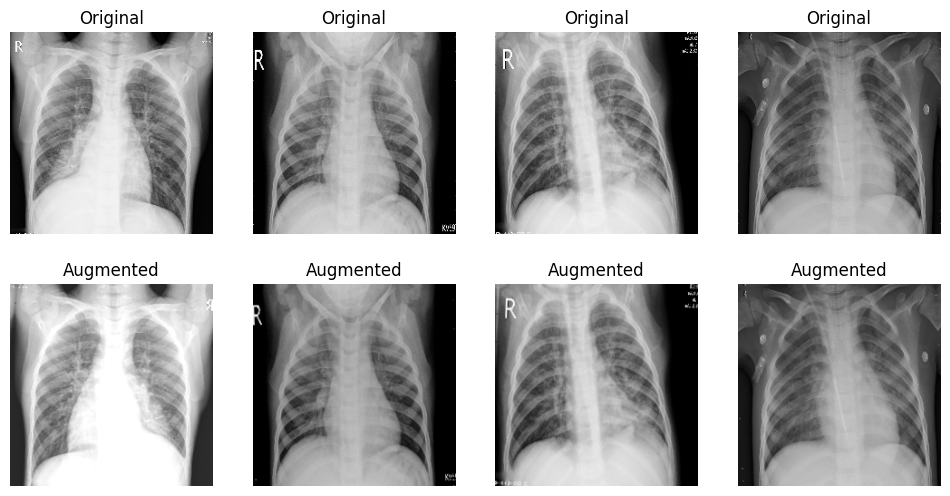

In [2]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(factor=(-0.02, 0.02)),
    layers.RandomBrightness(factor=(-0.2, 0.2))
])

# Extract images and labels
plt.figure(figsize=(12, 6))

for images, labels in train_dataset.take(1):
    images = images[:4].numpy()

    for i in range(4):
        # Display the original image and label
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title("Original")
        plt.axis("off")

        # Apply data augmentation transformations
        augmented_image = data_augmentation(images[i].reshape(1, 224, 224, 3))
        
        # Display the augmented image
        plt.subplot(2, 4, i + 5)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title("Augmented")
        plt.axis("off")

plt.show()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
Epoch 1/50
163/163 - 186s - 1s/step - accuracy: 0.8604 - loss: 0.5217 - val_accuracy: 0.8285 - val_loss: 0.4411
Epoch 2/50
163/163 - 178s - 1s/step - accuracy: 0.9279 - loss: 0.1781 - val_accuracy: 0.8253 - val_loss: 0.4599
Epoch 3/50
163/163 - 191s - 1s/step - accuracy: 0.9379 - loss: 0.1684 - val_accuracy: 0.8574 - val_loss: 0.3618
Epoch 4/50
163/163 - 200s - 1s/step - accuracy: 0.9317 - loss: 0.1738 - val_accuracy: 0.8237 - val_loss: 0.4432
Epoch 5/50
163/163 - 200s - 1s/step - accuracy: 0.9448 - loss: 0.1452 - val_accuracy: 0.8606 - val_loss: 0.4191
Epoch 6/50
163/163 - 195s - 1s/step - accuracy: 0.9427 - loss: 0.1378 - val_accuracy: 0.8766 - val_loss: 0.3371
Epoch 7/50
163/163 - 196s - 1s/step - accuracy: 0.9440 - loss: 0.1442 - val_accuracy: 0.8590 - val_loss: 0.4145
Epoch 8/50
163/163 - 197s - 1s/step - accuracy: 0.9519 - loss: 0.1269 - val_accuracy: 0.8606 - val_loss: 0.4278
Epoch 9/50
163/163 - 248s - 2s/step - accuracy: 0.955

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,458,181 (120.00 MB)

 Trainable params: 2,623,489 (10.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 5,246,980 (20.02 MB)

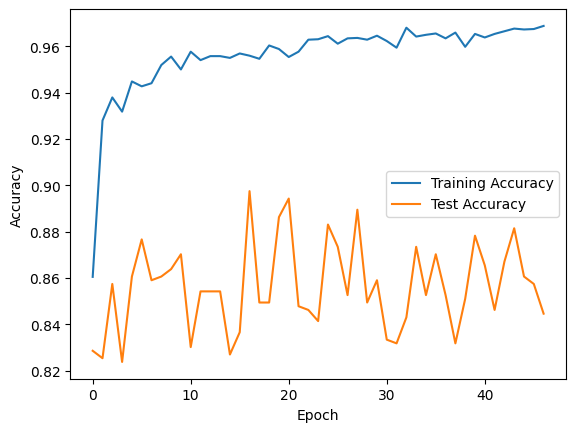

In [3]:
import time

# Use ResNet50 as the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Build a model on top of ResNet50
model = models.Sequential([
    data_augmentation,
    base_model,
    
    layers.GlobalAveragePooling2D(),
    
    # fc1
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.7),
    
    # fc2
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.7),
    # fc3
    layers.Dense(1, activation='sigmoid')  # Binary classification (Covid vs Normal)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=30, restore_best_weights=True)

start_time = time.time()

# Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=test_dataset,
    callbacks=[early_stopping],
    verbose=2
)

end_time = time.time()
total_training_time = end_time - start_time
print("Total training time: {:.2f} seconds".format(total_training_time))

model.summary()



In [7]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 783ms/step - accuracy: 0.8461 - loss: 0.5318
Test Loss: 0.32392236590385437
Test Accuracy: 0.8974359035491943


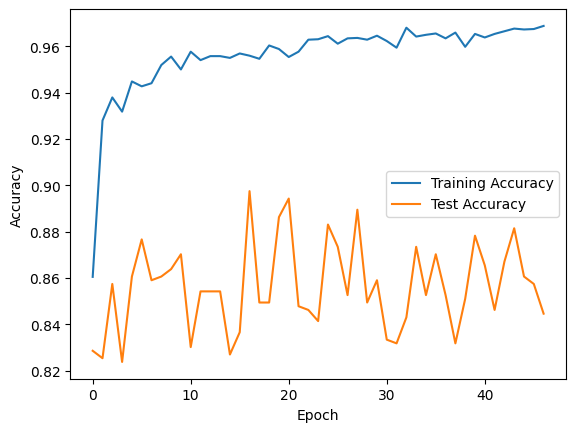

In [6]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 943ms/step


2024-04-01 05:34:10.368386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-01 05:34:10.659600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


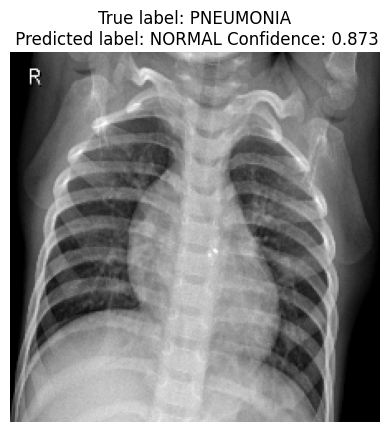

2024-04-01 05:34:10.871012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


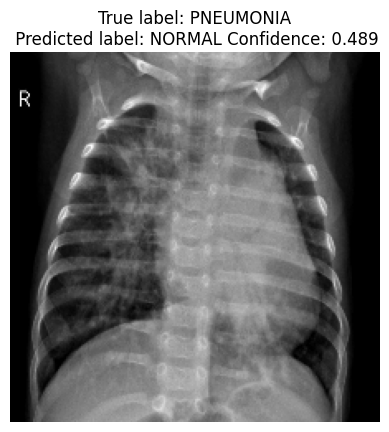

2024-04-01 05:34:11.037756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


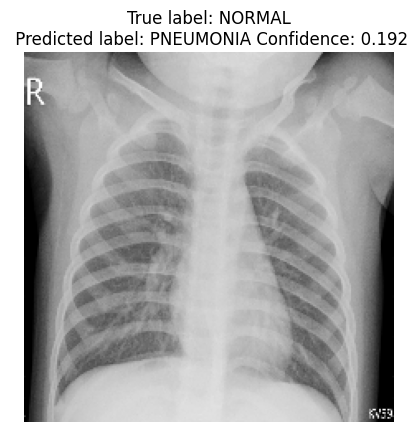

2024-04-01 05:34:11.198168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


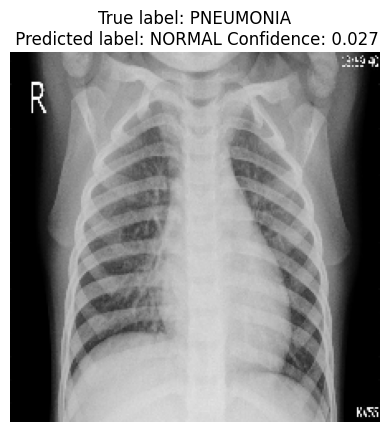

2024-04-01 05:34:11.368415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


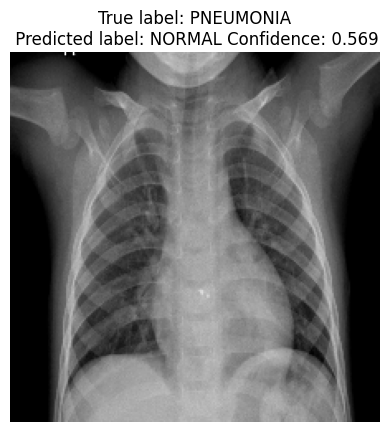

In [4]:
# Use the model to predict probabilities on the testing set
test_probs = model.predict(test_dataset)
test_preds = (test_probs > 0.5).astype(int)
test_labels = np.concatenate([y for x, y in test_dataset], axis=0)

# Filter incorrect predictions
incorrect_indices = np.where(test_preds != test_labels)[0]

# Display a reasonable amount (e.g., 20) of randomly selected incorrect images
num_images_to_display = min(5, len(incorrect_indices))
selected_indices = np.random.choice(incorrect_indices, num_images_to_display, replace=False)

for i in selected_indices:
    image, label = list(test_dataset.unbatch().as_numpy_iterator())[i]
    confidence_score = np.abs(0.5 - test_probs[i][0]) * 2  # Assuming binary classification
    predicted_label = int(test_preds[i])

    plt.imshow(image.astype("uint8"))
    plt.title(f'True label: {class_names[int(label)]}\n Predicted label: {class_names[predicted_label]} Confidence: {confidence_score:.3f}')
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Validation Accuracy: 0.9375
Validation F1 Score: 0.9411764705882353


2024-04-01 05:35:53.235253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-01 05:35:53.283422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


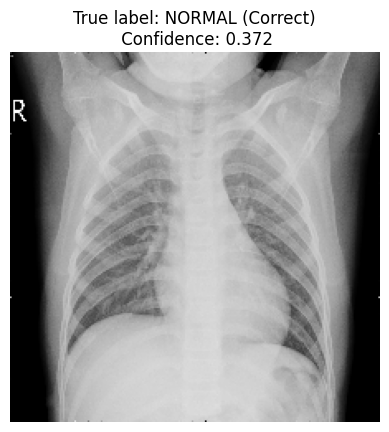

2024-04-01 05:35:53.390811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


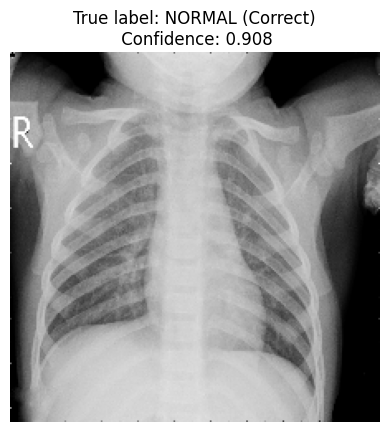

2024-04-01 05:35:53.495743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


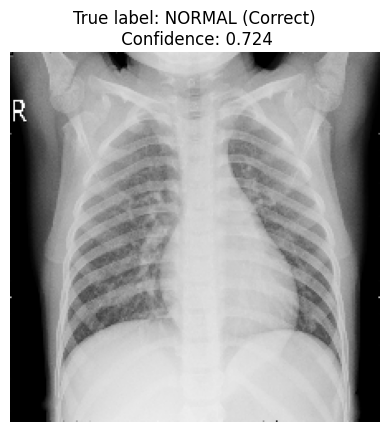

2024-04-01 05:35:53.591896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


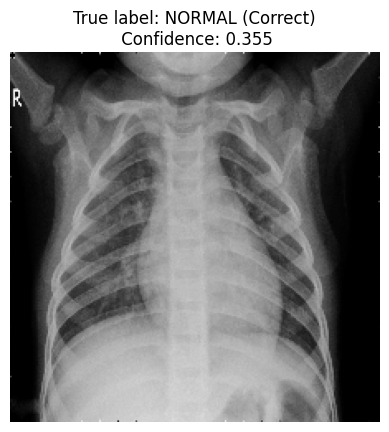

2024-04-01 05:35:53.700994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


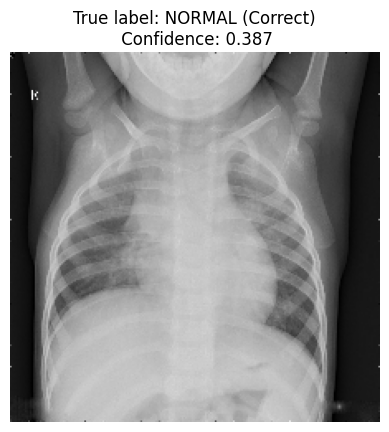

2024-04-01 05:35:53.807098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


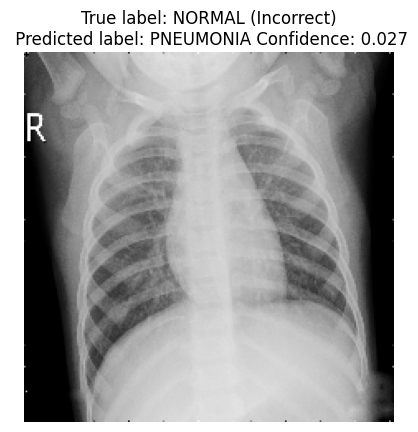

2024-04-01 05:35:53.933285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


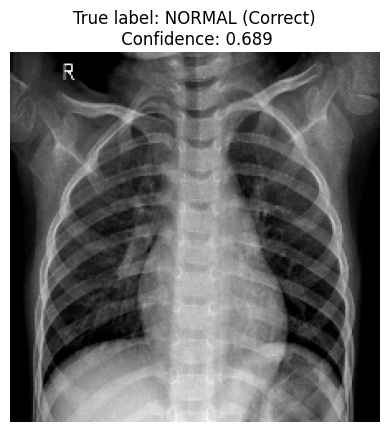

2024-04-01 05:35:54.031364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


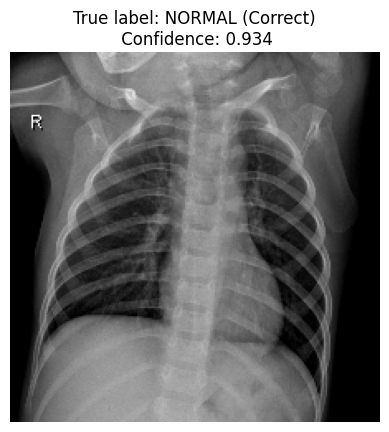

2024-04-01 05:35:54.124669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


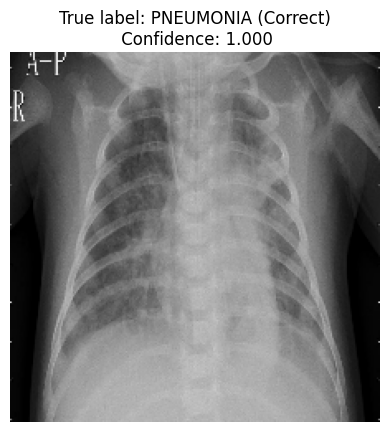

2024-04-01 05:35:54.218228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


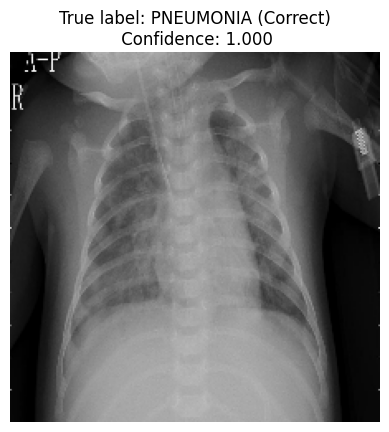

2024-04-01 05:35:54.314011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


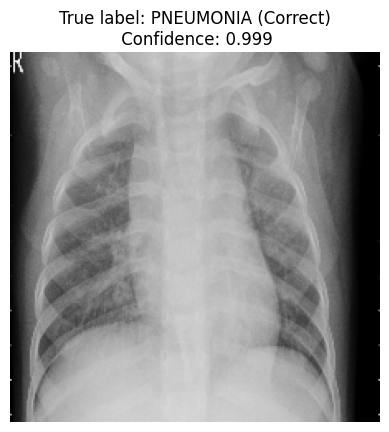

2024-04-01 05:35:54.409124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


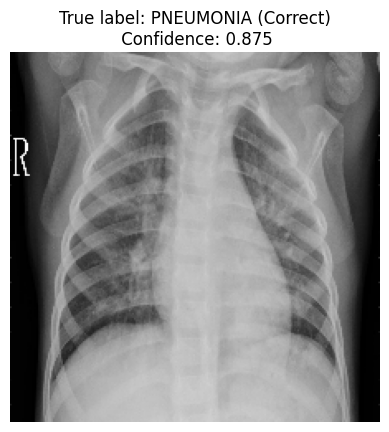

2024-04-01 05:35:54.509755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


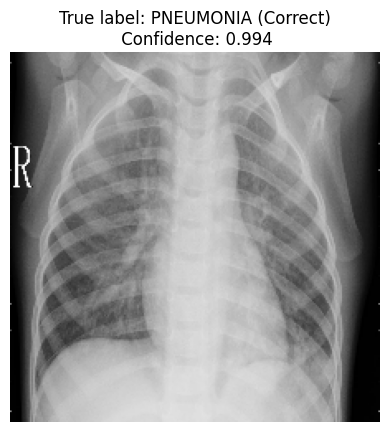

2024-04-01 05:35:54.606394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


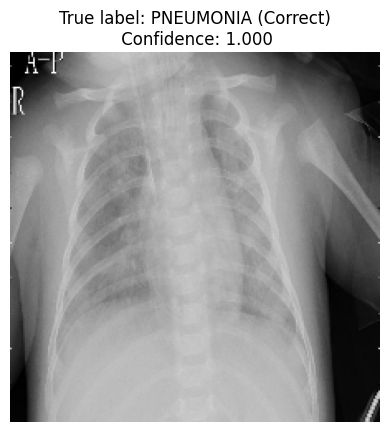

2024-04-01 05:35:54.701656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


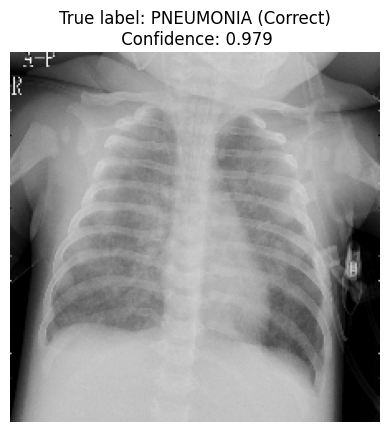

2024-04-01 05:35:54.795992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


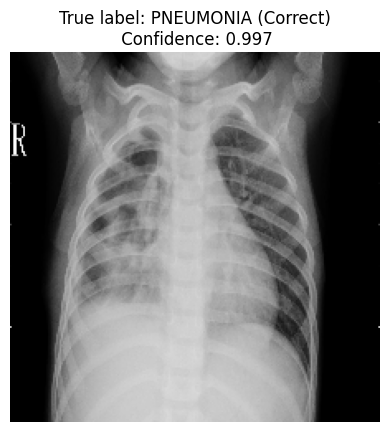

Average Confidence Score: 0.7650038902647793


In [5]:
# Use the model to predict probabilities on the validation set
val_probs = model.predict(val_dataset)
val_preds = (val_probs > 0.5).astype(int)
val_labels = np.concatenate([y for x, y in val_dataset], axis=0)

# Calculate metrics for the validation set
accuracy_val = accuracy_score(val_labels, val_preds)
precision_val = precision_score(val_labels, val_preds)
recall_val = recall_score(val_labels, val_preds)
f1_val = f1_score(val_labels, val_preds)

print("Validation Accuracy:", accuracy_val)
# print(f'Validation Precision: {precision_val}')
# print(f'Validation Recall: {recall_val}')
print(f'Validation F1 Score: {f1_val}')

# Initialize an empty list to store confidence scores
confidence_scores = []

# Display all images with labels and confidence scores
for i in range(len(val_labels)):
    image, label = list(val_dataset.unbatch().as_numpy_iterator())[i]
    
    confidence_score = np.abs(0.5-val_probs[i][0])*2  # Assuming binary classification
    confidence_scores.append(confidence_score)
    predicted_label = int(val_preds[i])

    plt.imshow(image.astype("uint8"))
    if predicted_label == int(label):
        # Correct prediction
        plt.title(f'True label: {class_names[int(label)]} (Correct)\n Confidence: {confidence_score:.3f}')
    else:
        # Incorrect prediction
        plt.title(f'True label: {class_names[int(label)]} (Incorrect)\n Predicted label: {class_names[predicted_label]} Confidence: {confidence_score:.3f}')

    plt.axis("off")
    plt.show()

# Calculate the average confidence score
average_confidence_score = np.mean(confidence_scores)
print("Average Confidence Score:", average_confidence_score)